# El modelo de **Izhikevich**

## **Ejercicio 1)** Importando librerías

**1)** Importe las librerías `numpy` para operar con arrays, `scipy` para utilizar rutinas de algebra lineal y `matplotlib.pyplot` para graficar.

**2)** Incorpore a la notebook el integrador de ODEs de la guía anterior.

In [2]:
# 1.1)
import os
import numpy as np
import scipy as sp
import scipy.linalg as linalg
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
# --- Styling für klare, journalsaubere Achsen ---
mpl.rcParams.update({
    # Basis-Typografie
    "font.size": 9,            # Basisschrift
    "axes.labelsize": 11,      # Achsenbeschriftungen
    "xtick.labelsize": 9,      # Tick-Labels
    "ytick.labelsize": 9,
    "legend.fontsize": 9,

    # Achsen & Spines
    "axes.spines.top": False,
    "axes.spines.right": False,

    # Tick-Erscheinung
    "xtick.direction": "out",
    "ytick.direction": "out",

    # Export & Layout
    "savefig.dpi": 300,
    "figure.dpi": 200,
    "pdf.fonttype": 42,        # TrueType einbetten (besser in Vektor-PDFs)
    "ps.fonttype": 42,
})

def style_axes(ax):
    """Einheitliche, gut lesbare Achsenästhetik."""
    ax.tick_params(axis="both", which="major", length=3.0, width=0.8)
    ax.tick_params(axis="both", which="minor", length=2.0, width=0.6)
    ax.minorticks_on()

# --- Figure-Sizes für REVTeX/zweispaltig ---
FIGDIR = "figs"
os.makedirs(FIGDIR, exist_ok=True)

USE_TWO_COLUMN_SIZE = False   # auf True setzen für kompaktere Figures
FIGSIZE_TWO_COL = (3.35, 2.2) # Breite x Höhe in Zoll (~85 mm)
FIGSIZE_WIDE    = (10, 6)     # deine bisherige Standardgröße

def _figsize():
    return FIGSIZE_TWO_COL if USE_TWO_COLUMN_SIZE else FIGSIZE_WIDE

def save_fig(name_base):
    """Speichert aktuelle Figure als PDF+PNG in figs/."""
    plt.tight_layout()
    plt.savefig(f"{FIGDIR}/{name_base}.pdf", bbox_inches="tight")
    plt.savefig(f"{FIGDIR}/{name_base}.png", bbox_inches="tight")


In [4]:
def euler(f,x,t,h,p):
    """Un paso del método de Euler."""
    return x + h * f(x,t,p)

def rk4(f,x,t,h,p):
    """Un paso del método de Runge Kutta orden 4."""
    k1 = f(x,t,p)
    k2 = f(x+0.5*h*k1,t+0.5*h,p)
    k3 = f(x+0.5*h*k2,t+0.5*h,p)
    k4 = f(x+h*k3,t+h,p)
    return x + h*(k1 + 2.0*k2 + 2.0*k3 + k4)/6.0

def integrador_ode(m,f,xa,a,b,k,p,c=lambda x,t,p:x):
    """Integra dx/dt = f(x,t) en [a,b] con k pasos."""
    assert k>0
    n = len(xa)
    h = (b-a)/k
    w = np.zeros((n,k+1))
    t = np.zeros(k+1)
    w[:,0] = xa
    t[0] = a
    for j in range(k):
        t[j+1] = t[j] + h
        w[:,j+1] = m(f,w[:,j],t[j],h,p)
        w[:,j+1] = c(w[:,j+1],t[j+1],p)
    return t,w


## **Ejercicio 2)** Modelo de Izhikevich

El modelo de Izhikevich (ref. 1.) es una simplificación del conocido modelo que Hodgkin y Huxley introdujeron en 1952 (ref. 2. y premio Nobel en Fisiología y Medicina de 1963) para describir el comportamiento del potencial de disparo de una neurona.

El modelo de Izhikevich se describe en términos de la siguiente ODE bidimensional y de primer orden

\begin{eqnarray}
v'(t) &=& g_2v^2(t) + g_1v(t) + g_0 - u(t) + I(t) \\
u'(t) &=& b(cv(t)-u(t))
\end{eqnarray}

unida al mecanismo de *reseteo* del potencial

\begin{eqnarray}
v(t) &\leftarrow& v_- \\
u(t) &\leftarrow& u(t) + \Delta u \\
\end{eqnarray}

la cuál emula el disparo de la neurona, imponiendose cuando la condición $v(t)\geq v_+$ se cumple.

En todas estas ecuaciones, $g_2$, $g_1$, $g_0$, $v_-$, $v_+$, $b$, $c$ y $\Delta u$ son parámetros del modelo.

Además, se considera la función dependiente del tiempo $I:\mathbb{R}\ni t\to I(t)\in \mathbb{R}$, la cual representa una corriente de entrada que exita a la neurona.

Referencias:

1. [Eugene M. Izhikevich, Simple Model of Spiking Neurons, IEEE TRANSACTIONS ON NEURAL NETWORKS, VOL. 14, NO. 6, P. 1569, NOVEMBER 2003](https://ieeexplore.ieee.org/document/1257420)
  
    [PDF de acceso libre](https://www.izhikevich.org/publications/spikes.pdf)
2. https://en.wikipedia.org/wiki/Hodgkin%E2%80%93Huxley_model

***

**1)** Integre el modelo de Izhikevich usando el método RK4 en el intérvalo de tiempo

* $t\in [0,200]$

Considere, para ello, la siguiente elección de valores de los parámetros (pero pruebe variaciones para los distintos casos)

* $g_2=0.04$

* $g_1=5$

* $g_0=140$

* $v_-=-65$

* $v_+=30$

* $b=0.02$

* $c=0.2$

* $\Delta u=2$

una corriente de entrada

\begin{eqnarray}
I(t)
&=&
\left\{
\begin{array}{ll}
0  & t < 10 \\
10 & c.c.
\end{array}
\right.
\end{eqnarray}

y comience probando con la condición inicial

* $v(0) = -70$

* $u(0) = cv(0)$

Además, utilice el paso de integración

$h=0.1$

**2)** Grafique la solución.

**3)** Reproduzca, aproximadamente, los últimos 8 paneles de la figura 2 del paper en la referencia 1.

Para ello, tenga en cuenta la siguiente tabla confeccionada a partir de la información en la figura 2 del paper

$$
\begin{aligned}
& \text {Tabla 1. Parmaterización por caso. }\\
&\begin{array}{ccccc}
\hline \hline
\text { Caso } & b & c & v_- & \Delta u & I \\
\hline
\text { RS }  & 0.02 & 0.2  & -65 & 8    & I_1 \\
\text { IB }  & 0.02 & 0.2  & -55 & 4    & I_1 \\
\text { CH }  & 0.02 & 0.2  & -50 & 2    & I_1 \\
\text { FS }  & 0.1  & 0.2  & -65 & 2    & I_1 \\
\text { TC1 } & 0.02 & 0.25 & -65 & 0.05 & I_2 \\
\text { TC2 } & 0.02 & 0.25 & -65 & 0.05 & I_3 \\
\text { RZ }  & 0.1  & 0.26 & -65 & 2    & I_4 \\
\text { LTS } & 0.02 & 0.25 & -65 & 2    & I_1 \\
\hline
\end{array}
\end{aligned}
$$

donde

\begin{eqnarray}
I_1(t)
&=&
\left\{
\begin{array}{ll}
0  & t < 25 \\
10 & c.c.
\end{array}
\right. \\
I_2(t)
&=&
\left\{
\begin{array}{ll}
0  & t < 150 \\
2.5 & c.c.
\end{array}
\right. \\
I_3(t)
&=&
\left\{
\begin{array}{ll}
-15  & t < 100 \\
0 & c.c.
\end{array}
\right. \\
I_4(t)
&=&
\left\{
\begin{array}{ll}
0    & t < 10 \\
.2 & 10 \leq t < 100 \\
10   & 100 \leq t < 101 \\
.2 & c.c.
\end{array}
\right.
\end{eqnarray}

0
Integrando neurona 0: 1)
  Spikes: 13


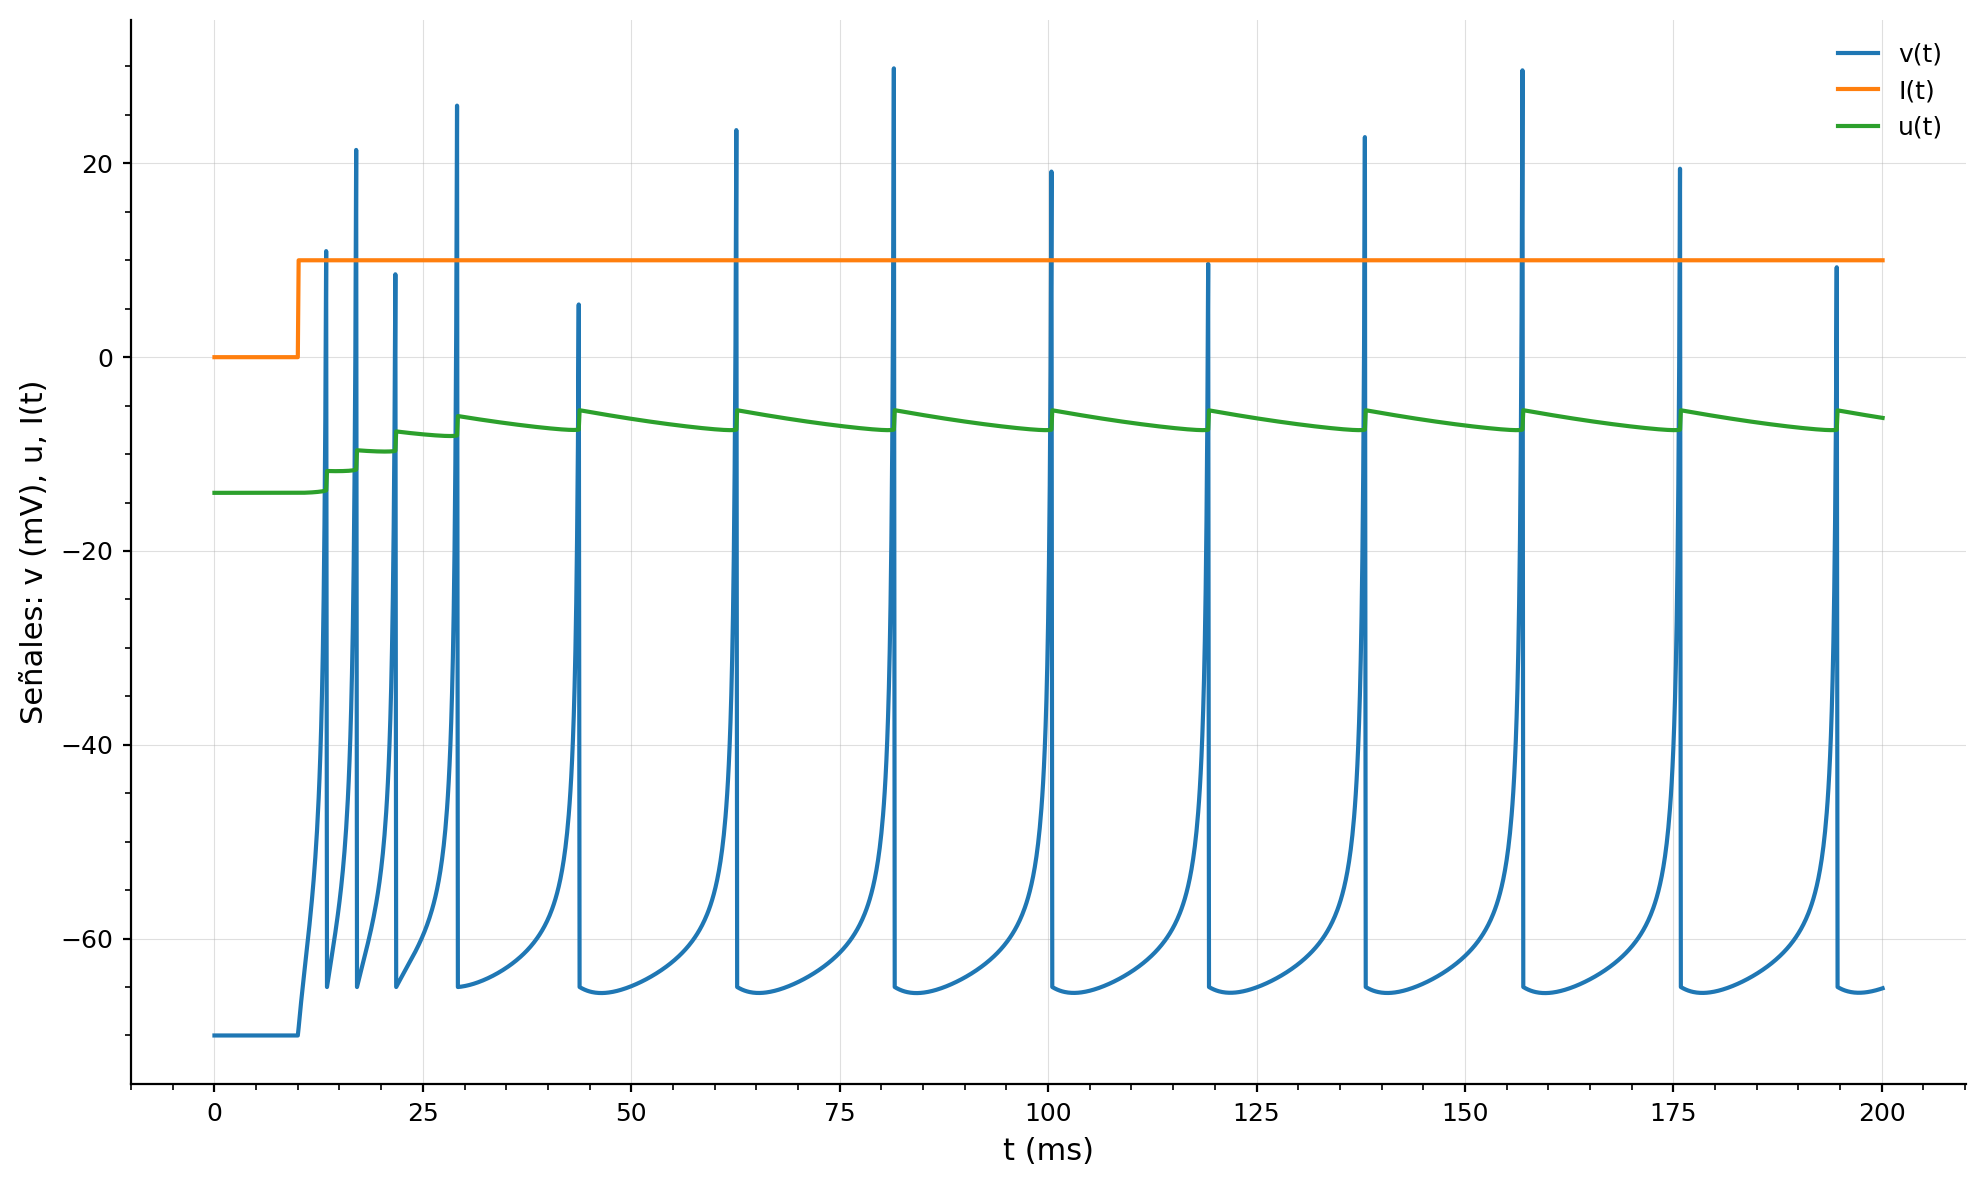

In [5]:
tmax = 200
g0 = 140
g1 = 5
g2 = 0.04
vmas = 30

# Parameter für 1 Neurontyp
c = np.array([0.2])
b = np.array([0.02])
vmenos = np.array([-65])
du = np.array([2])
string = "1)"
elemen = len(b)
t_rango = (0, tmax)
h = 0.1

# Strom
def I_func(t,i):
    if i == 0:
        return 0 if t < 10 else 10

def f_ode(u, v, t, i, b_i, c_i):
    dv_dt = g2*v**2 + g1*v + g0 - u + I_func(t, i)
    du_dt = b_i*(c_i*v - u)
    return du_dt, dv_dt

def rk4_sistema(f, u, v, t, h, i, b_i, c_i):
    k1_u, k1_v = f(u, v, t, i, b_i, c_i)
    k2_u, k2_v = f(u + 0.5*h*k1_u, v + 0.5*h*k1_v, t + 0.5*h, i, b_i, c_i)
    k3_u, k3_v = f(u + 0.5*h*k2_u, v + 0.5*h*k2_v, t + 0.5*h, i, b_i, c_i)
    k4_u, k4_v = f(u + h*k3_u, v + h*k3_v, t + h, i, b_i, c_i)
    un = u + h*(k1_u + 2*k2_u + 2*k3_u + k4_u)/6
    vn = v + h*(k1_v + 2*k2_v + 2*k3_v + k4_v)/6
    return un, vn

def Integraconrk4Izikevich(f, t_int, h, i):
    c_i = c[i]
    b_i = b[i]
    vmenos_i = vmenos[i]
    du_i = du[i]

    v0 = -70
    u0 = c_i * v0

    t0, tf = t_int
    t_values, u_values, v_values = [t0], [u0], [v0]
    t, u, v = t0, u0, v0
    spike_times = []

    while t < tf:
        un, vn = rk4_sistema(f, u, v, t, h, i, b_i, c_i)
        if (v < vmas) and (vn >= vmas):
            un = u + du_i
            vn = vmenos_i
            spike_times.append(t)
        u, v, t = un, vn, t+h
        t_values.append(t)
        u_values.append(u)
        v_values.append(v)
    return t_values, u_values, v_values, spike_times

# Plot
for i in range(elemen):
    print(i)
    print(f"Integrando neurona {i}: {string.split()[i]}")
    t_values, u_values, v_values, spike_times = Integraconrk4Izikevich(f_ode, t_rango, h, i)

    print(f"  Spikes: {len(spike_times)}")
    fig, ax = plt.subplots(figsize=_figsize())
    ax.plot(t_values, v_values, label="v(t)")
    I_values = [I_func(t, i) for t in t_values]
    ax.plot(t_values, I_values, label="I(t)")
    ax.plot(t_values, u_values, label="u(t)")

    ax.set_xlabel("t (ms)")
    ax.set_ylabel("Señales: v (mV), u, I(t)")
    ax.grid(True, linewidth=0.4, alpha=0.4)
    ax.legend(frameon=False, handlelength=1.6)
    style_axes(ax)

    save_fig(f"parte1_neurona{i}")
    plt.show()


0
Integrando neurona 0: RS
  Spikes: 5


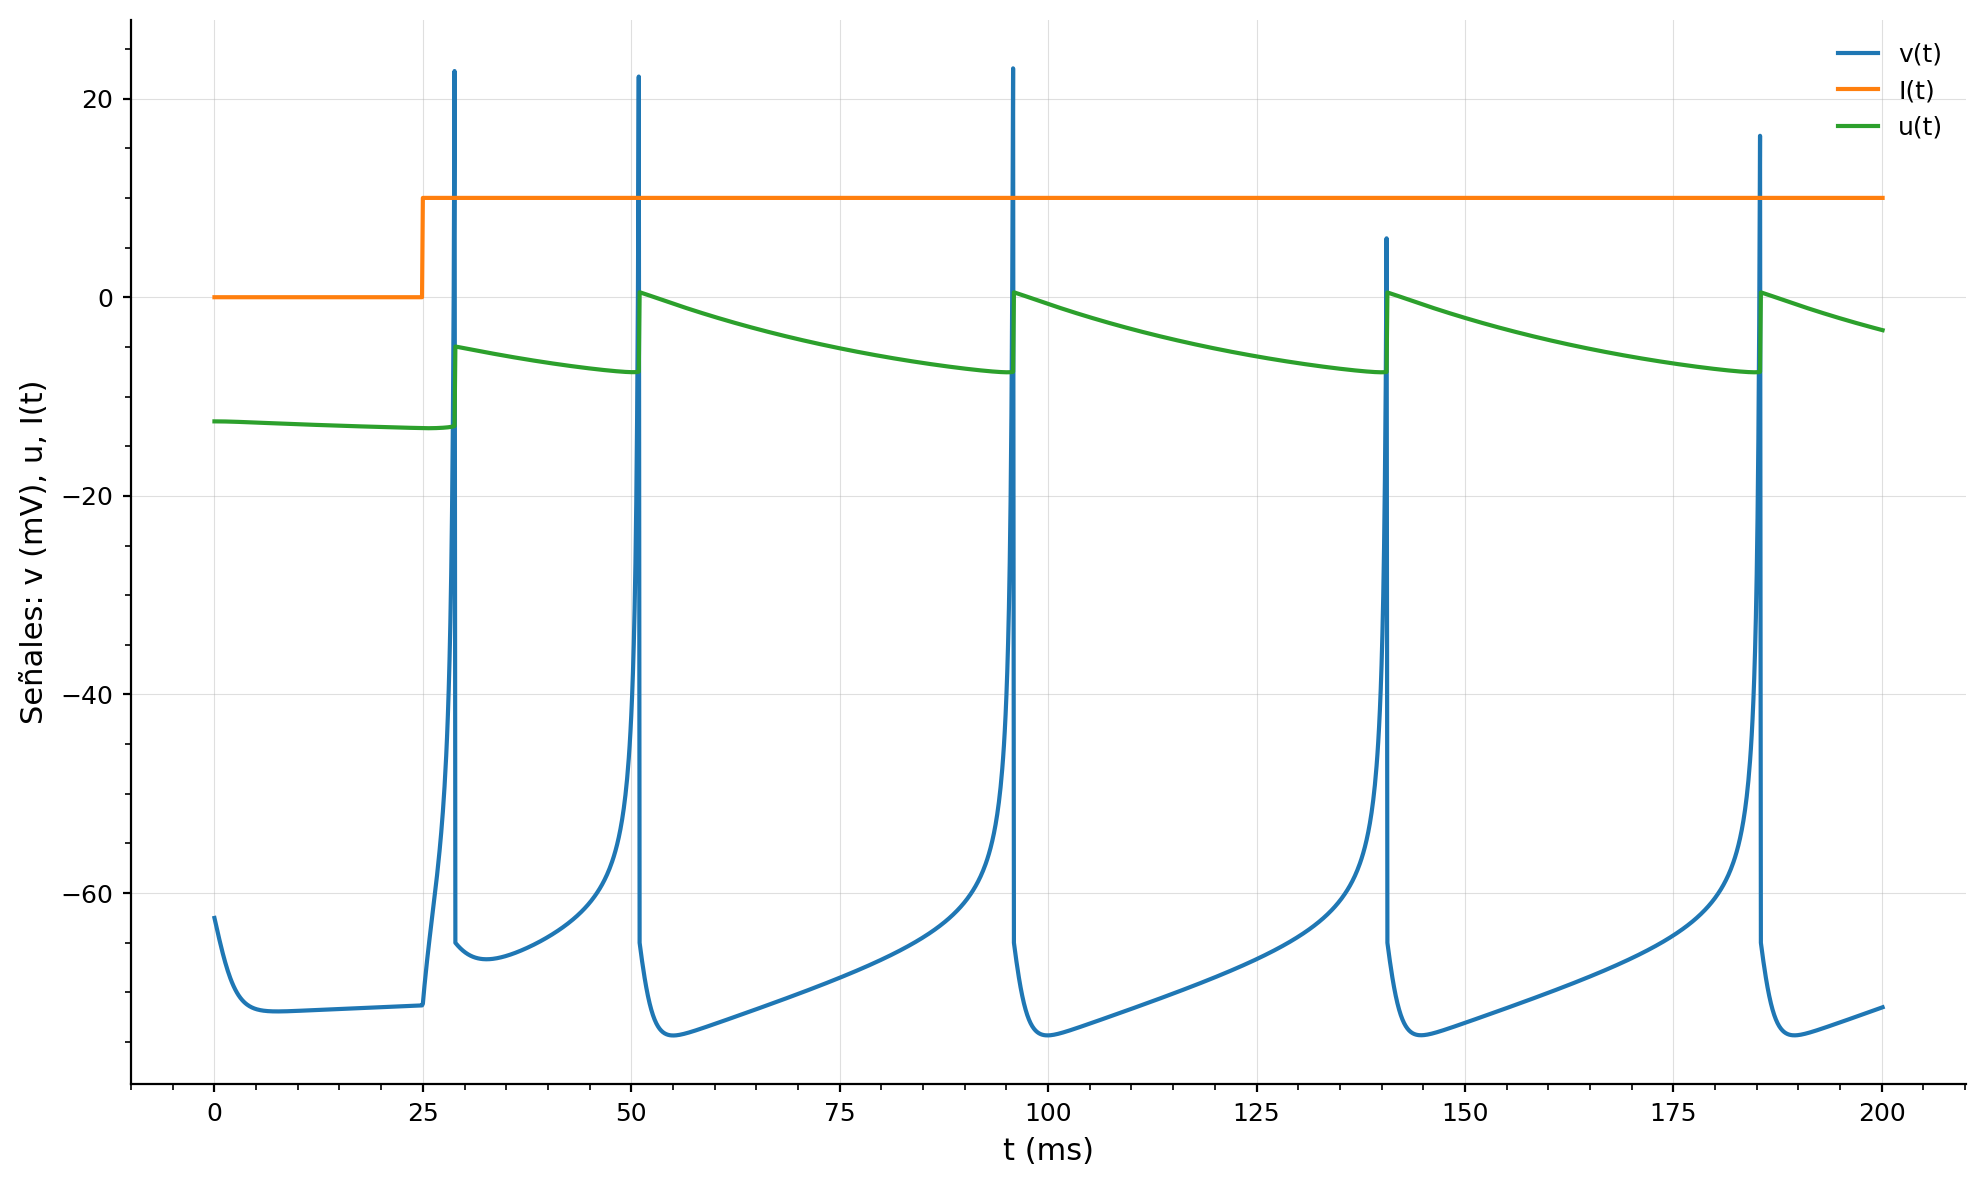

1
Integrando neurona 1: IB
  Spikes: 8


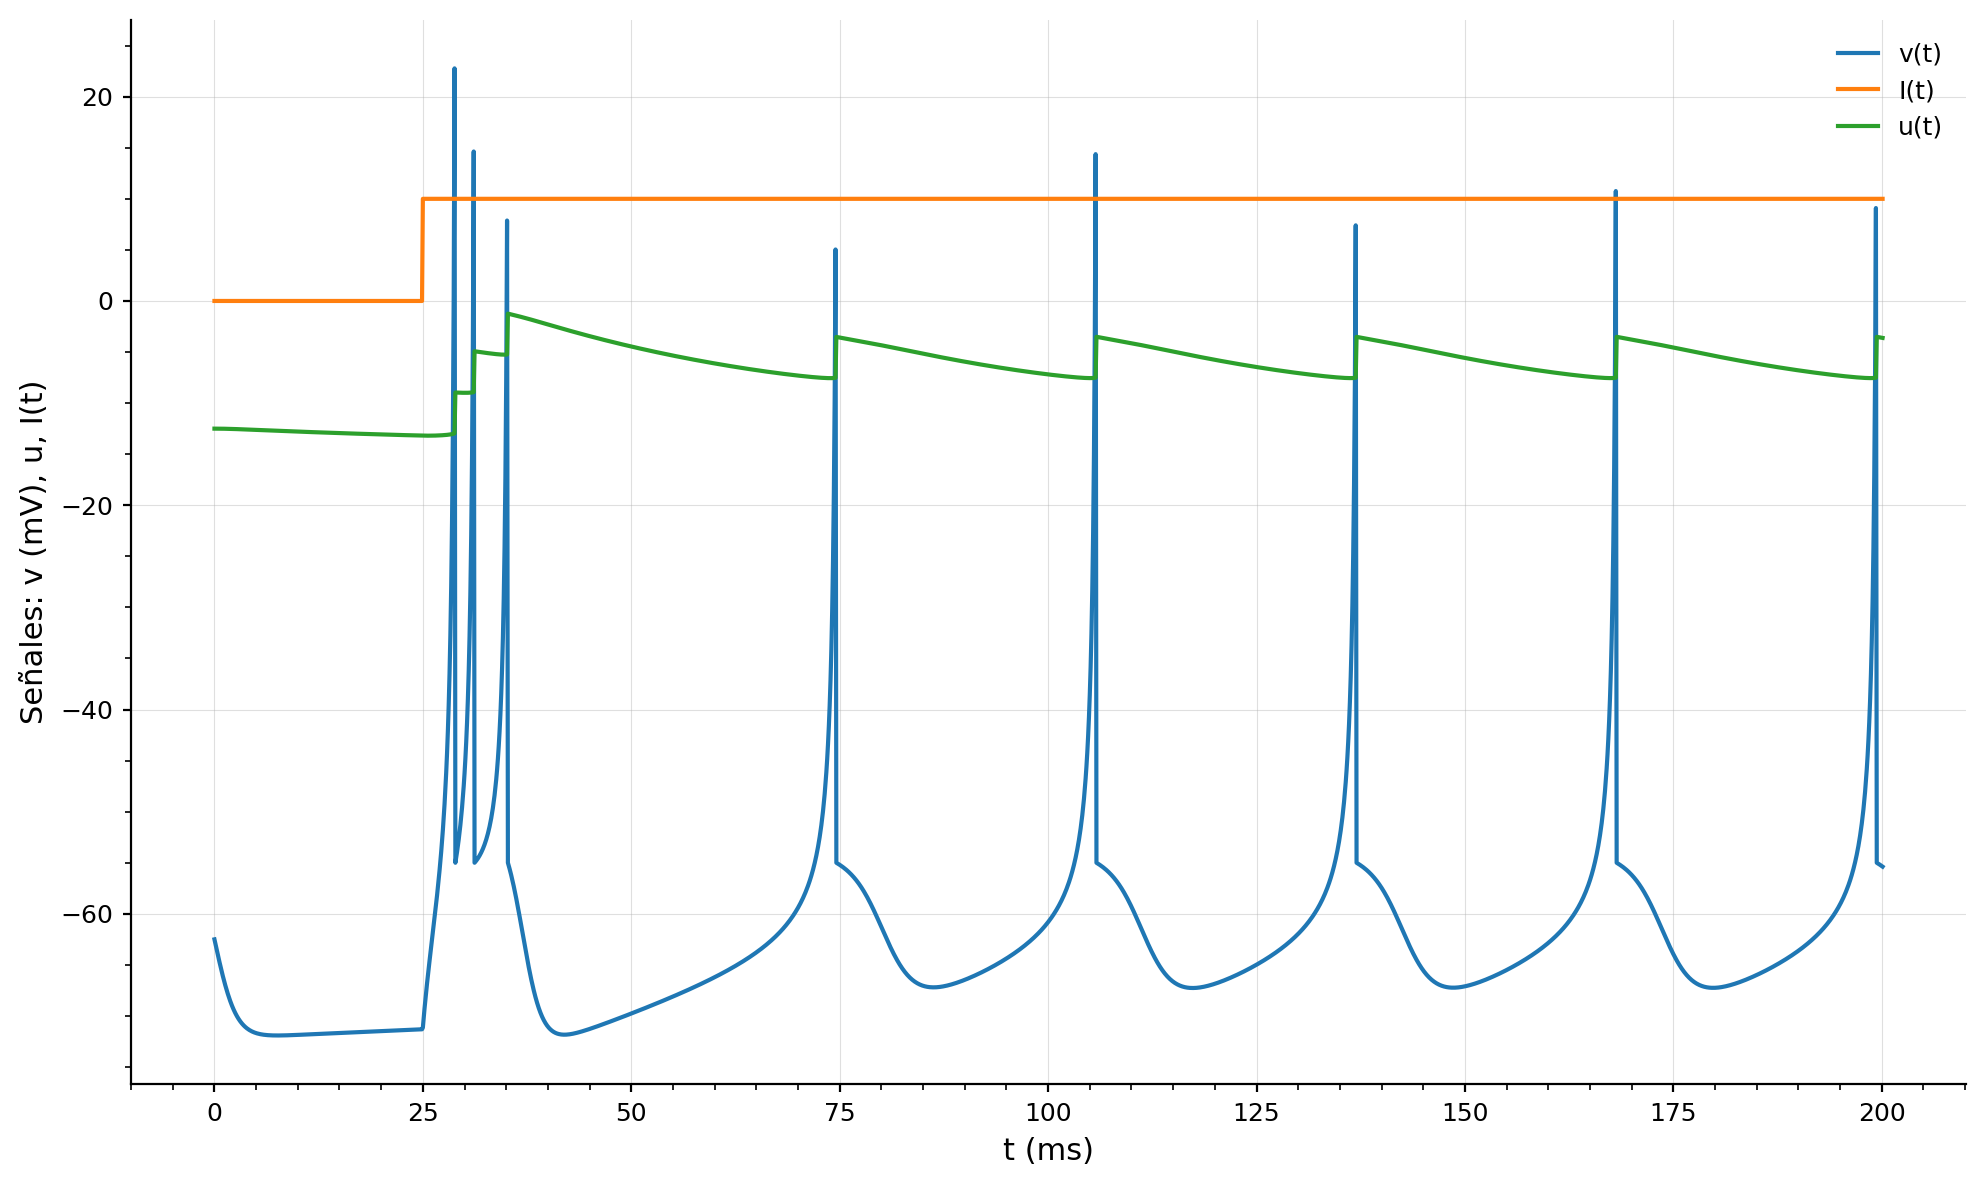

2
Integrando neurona 2: CH
  Spikes: 17


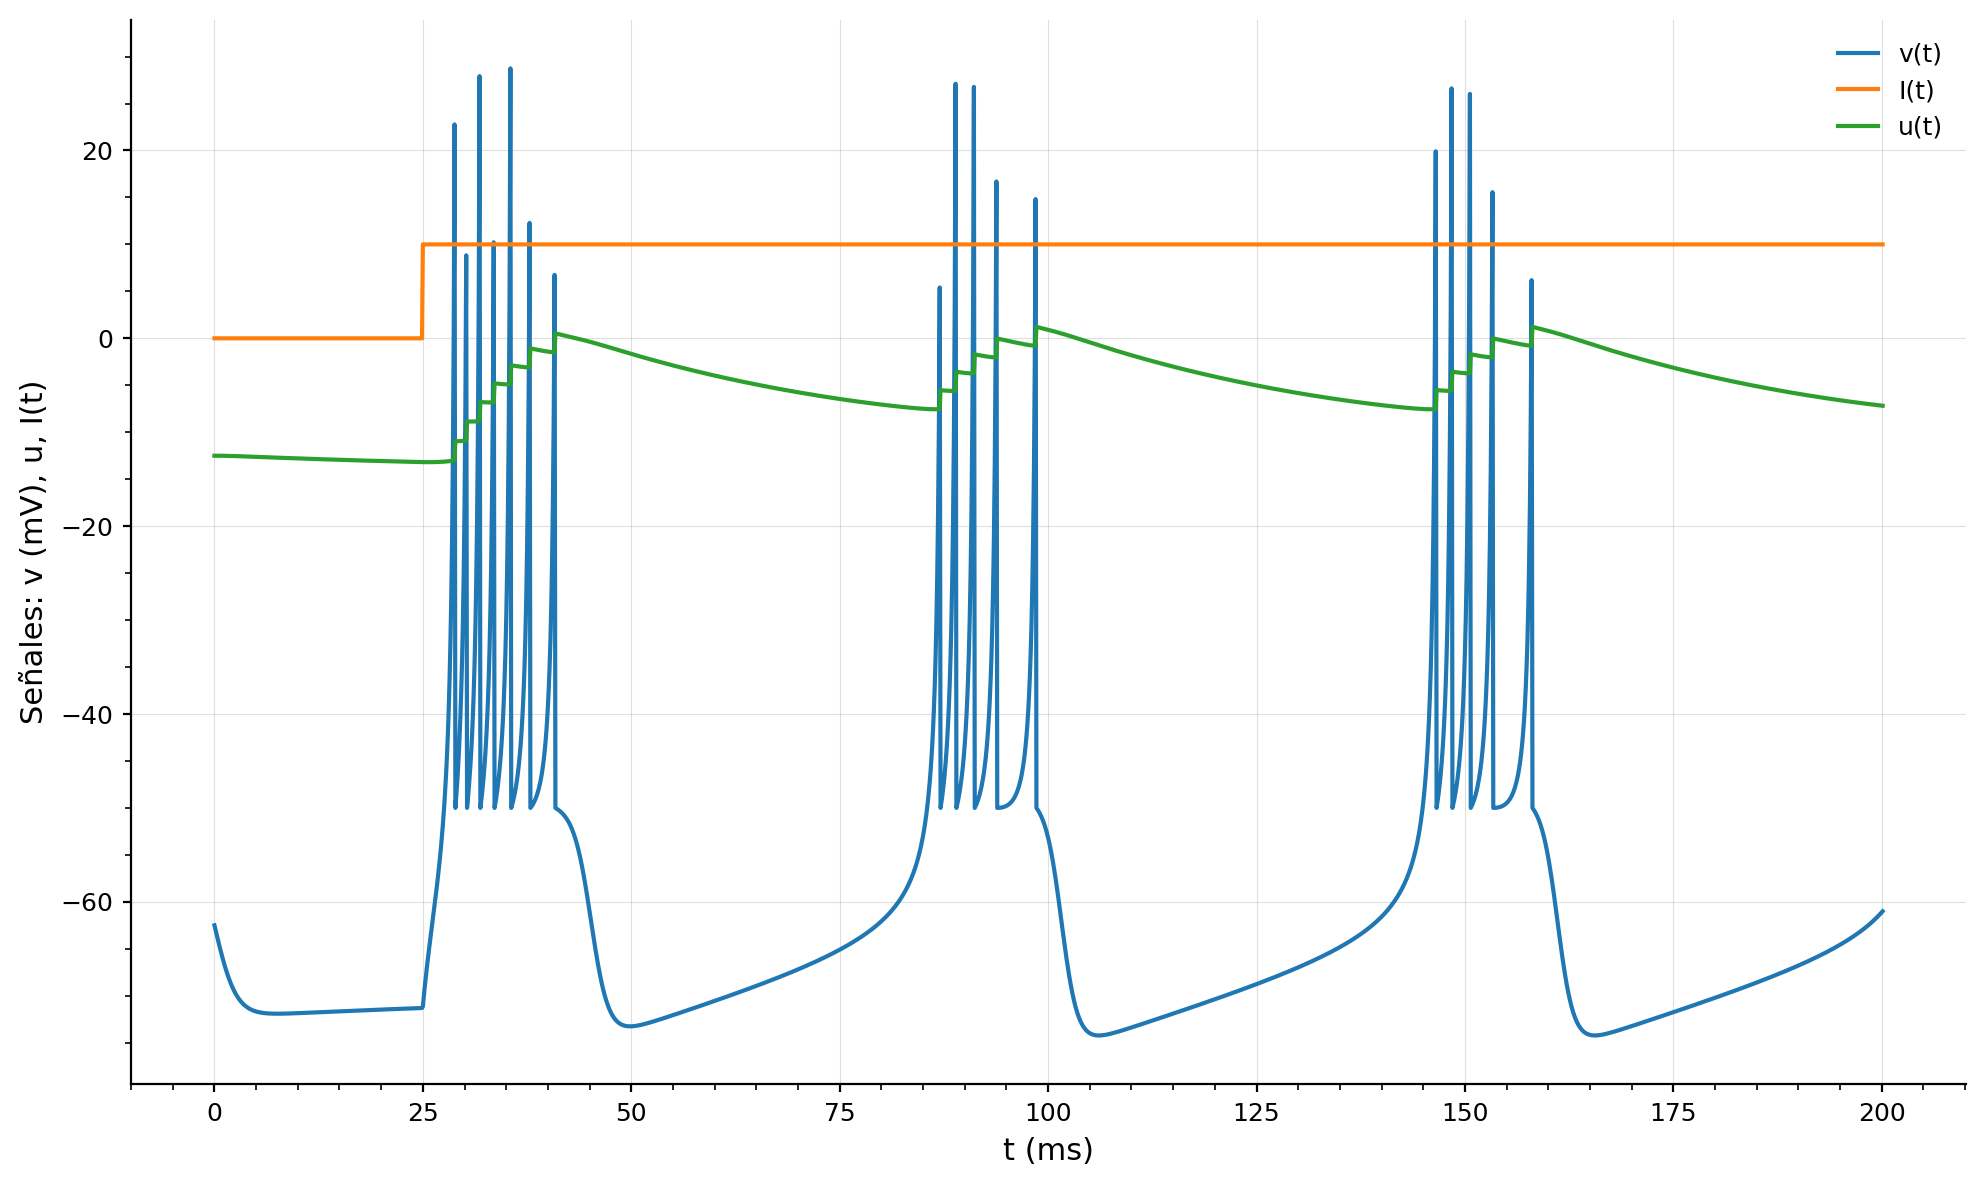

3
Integrando neurona 3: FS
  Spikes: 25


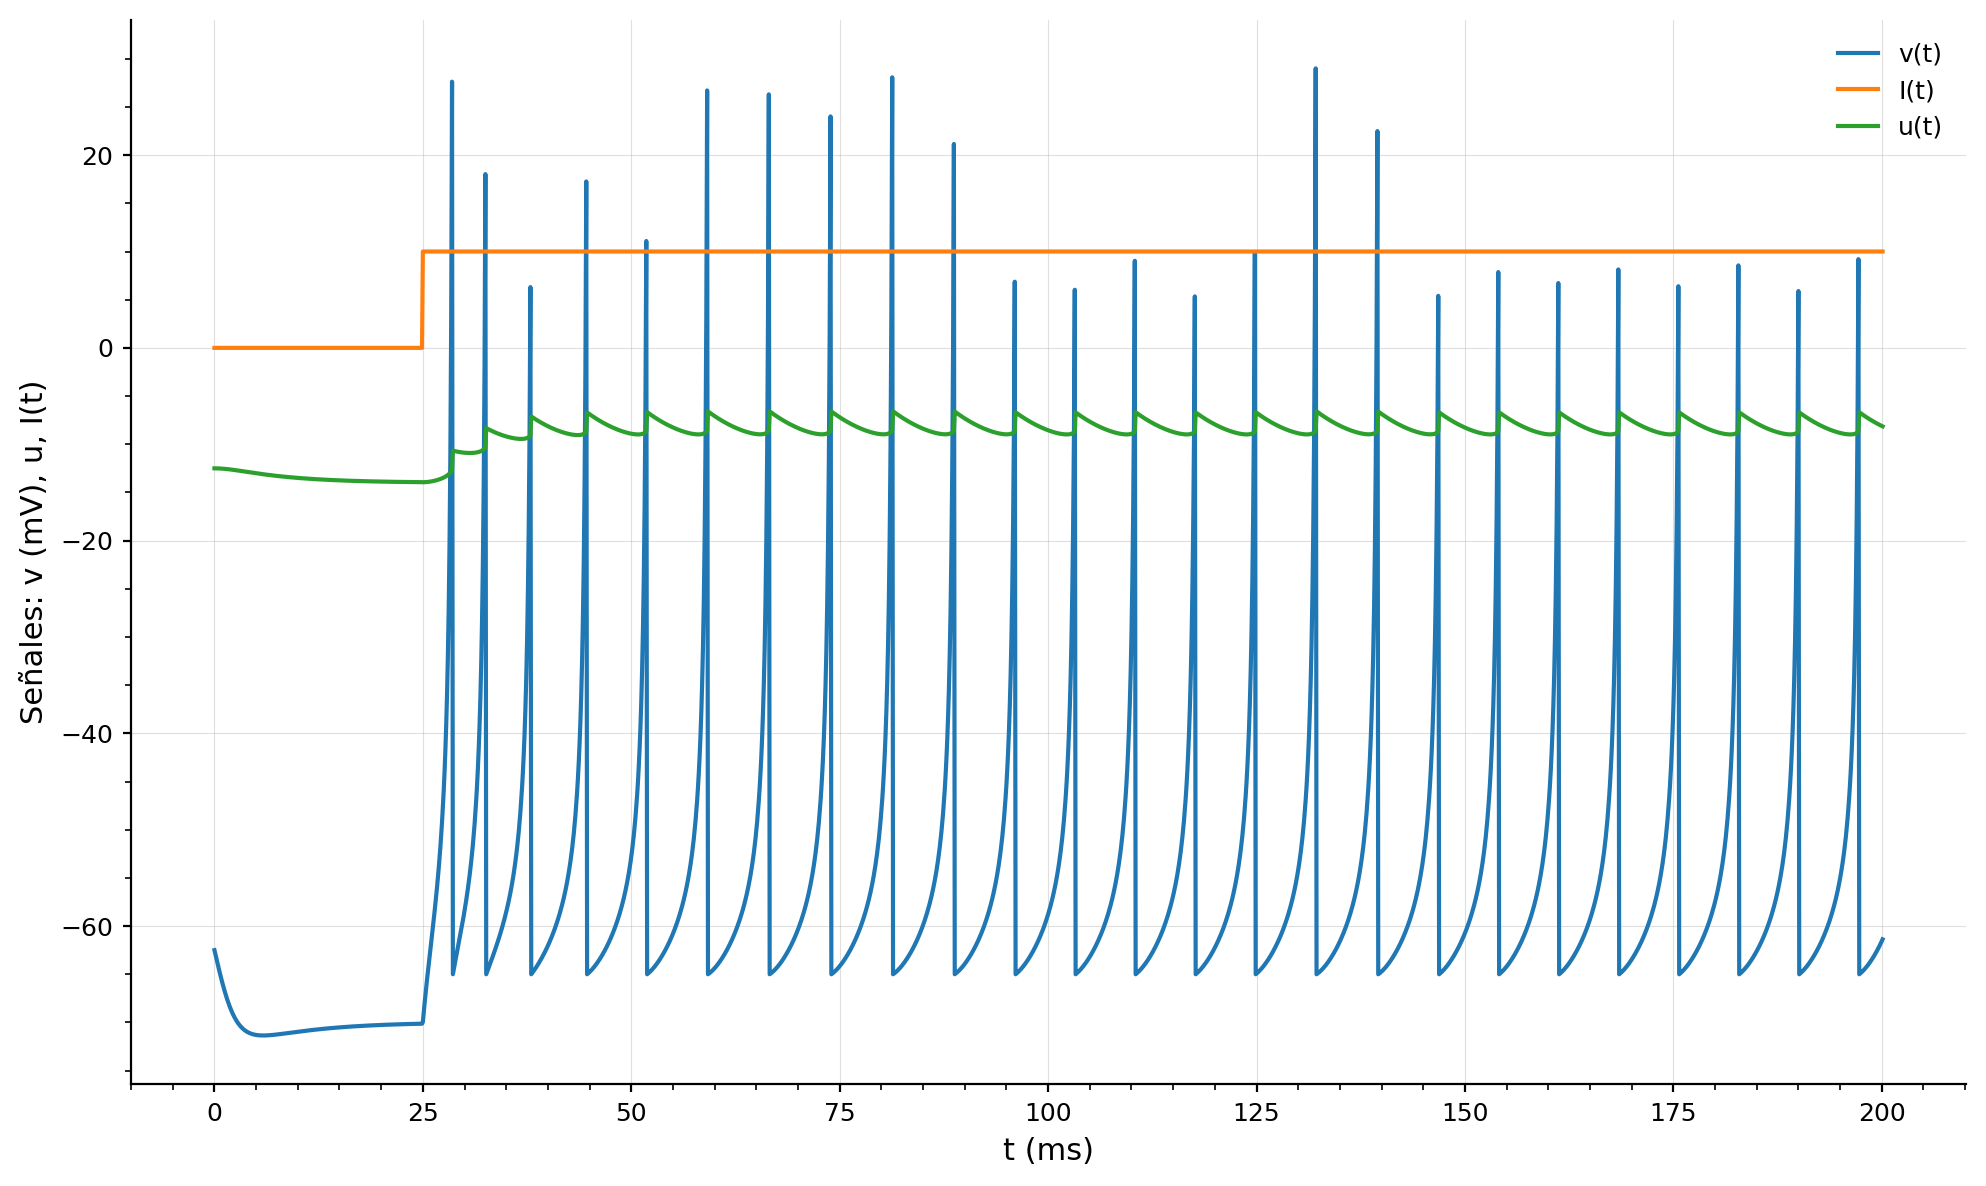

4
Integrando neurona 4: TC1
  Spikes: 6


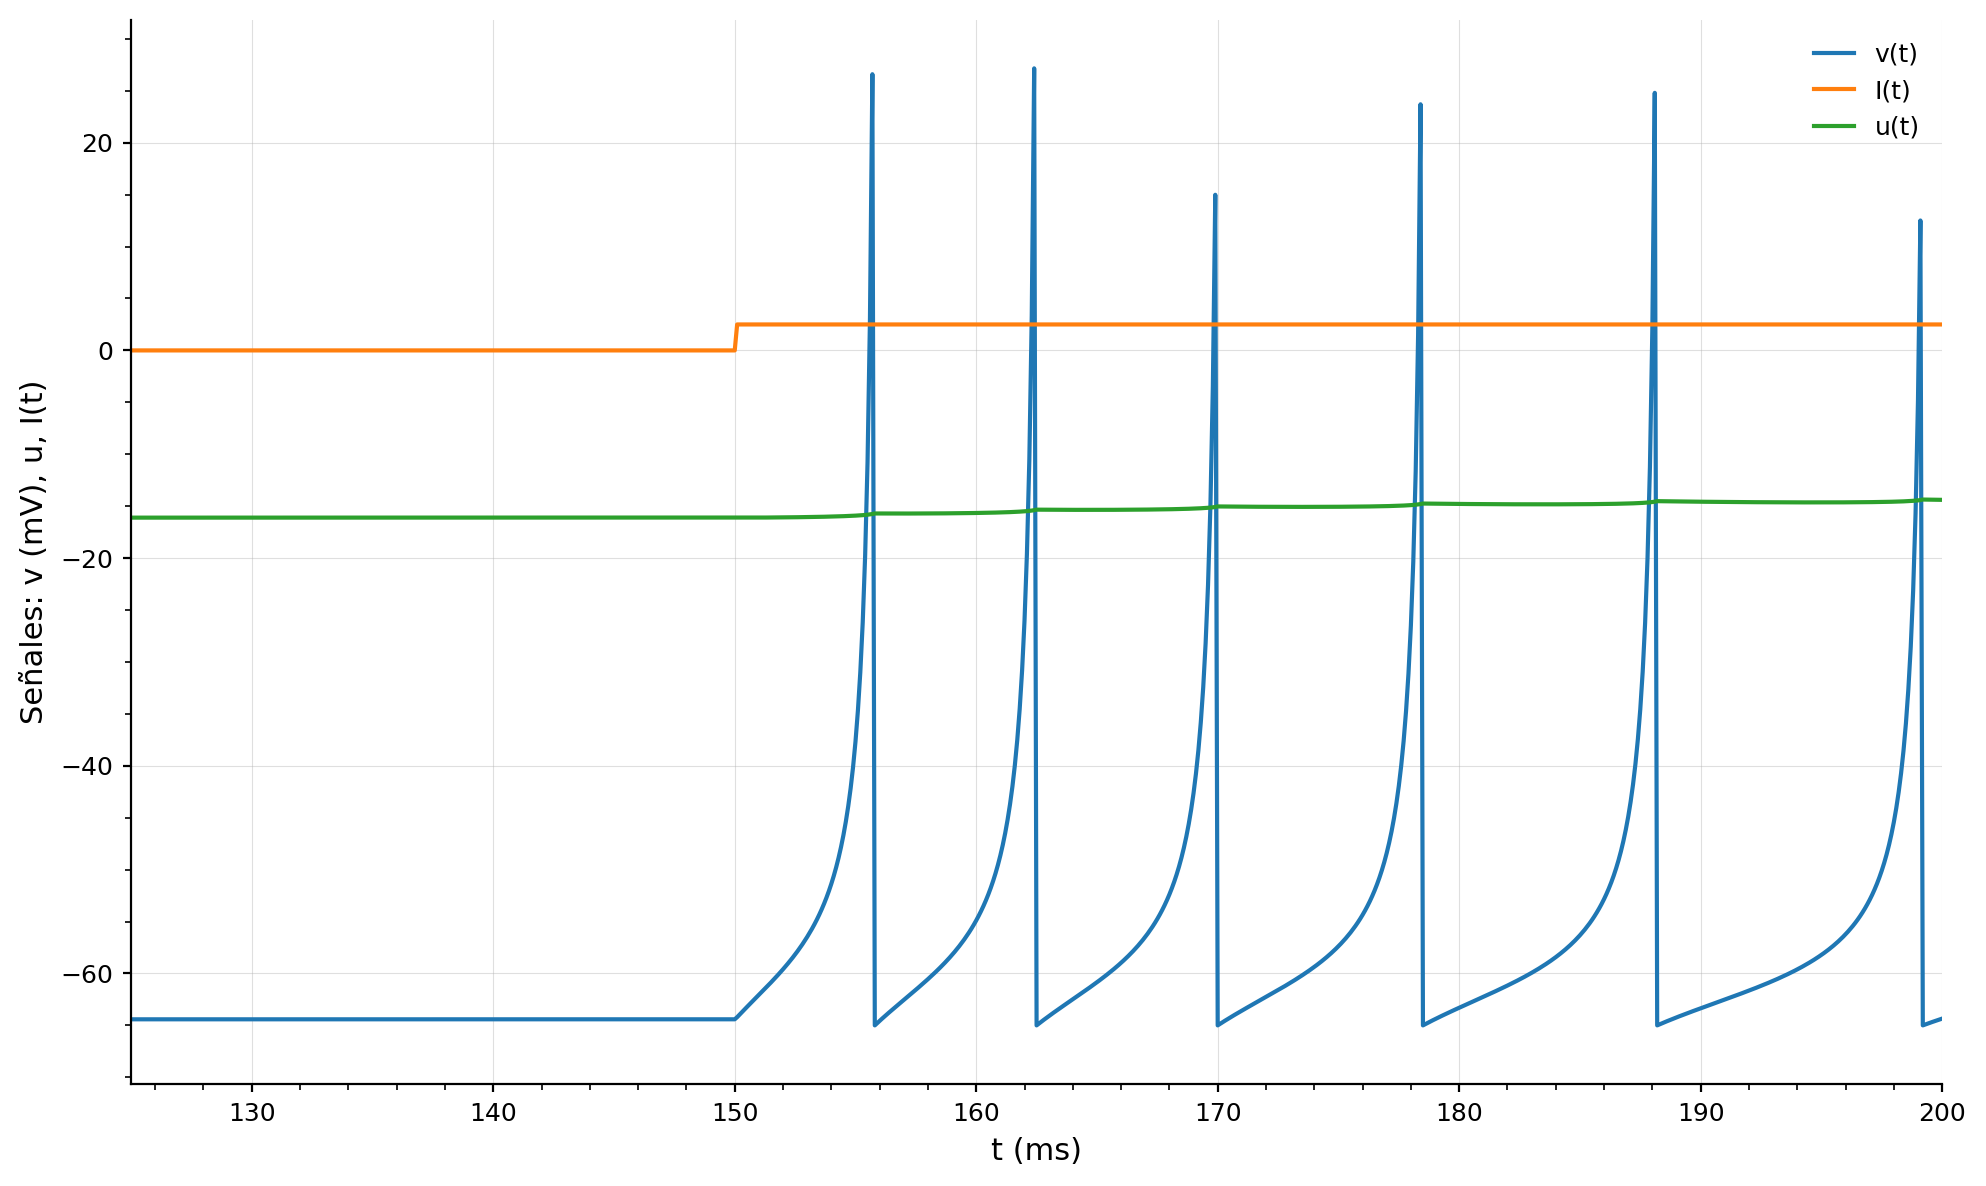

5
Integrando neurona 5: TC2
  Spikes: 5


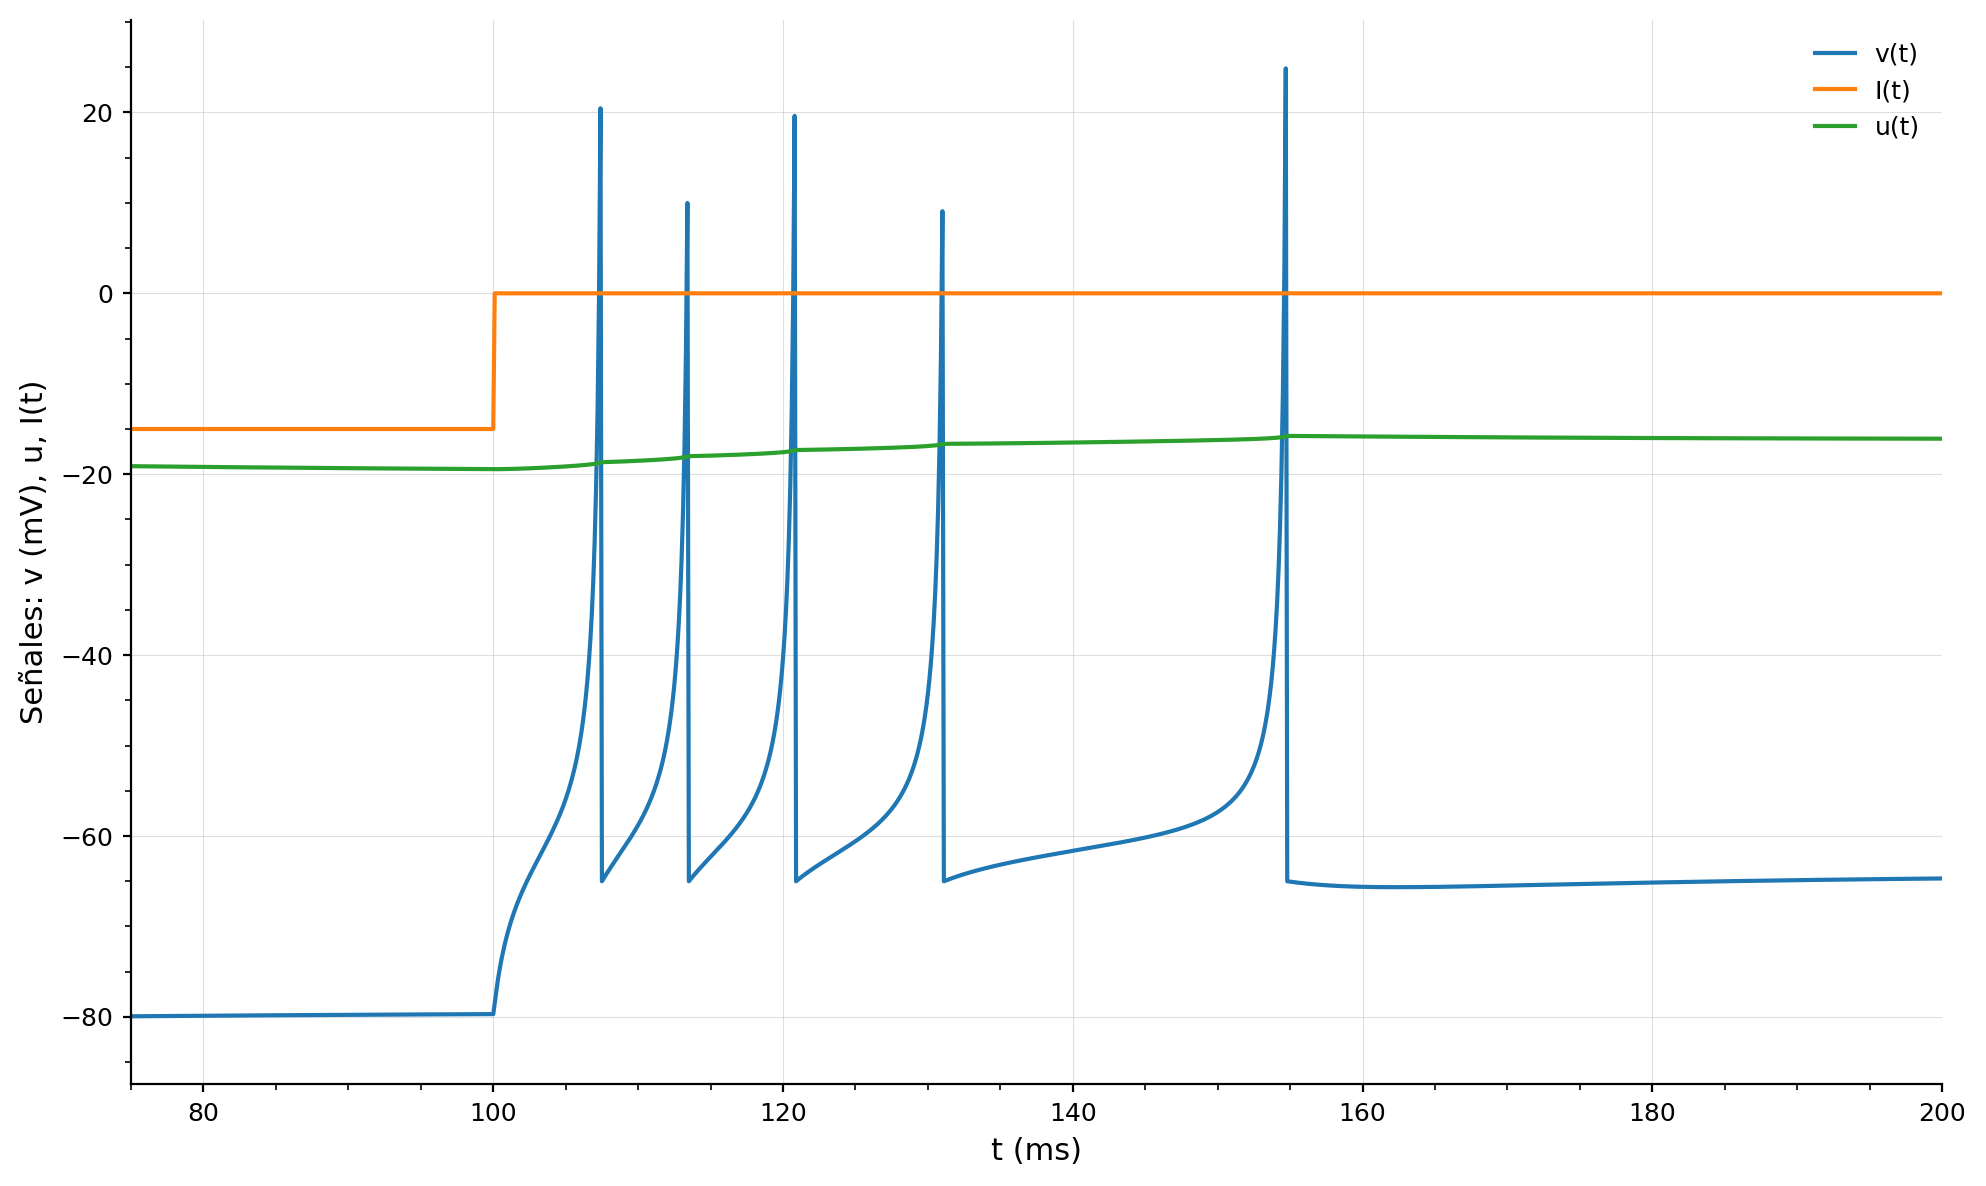

6
Integrando neurona 6: RZ
  Spikes: 3


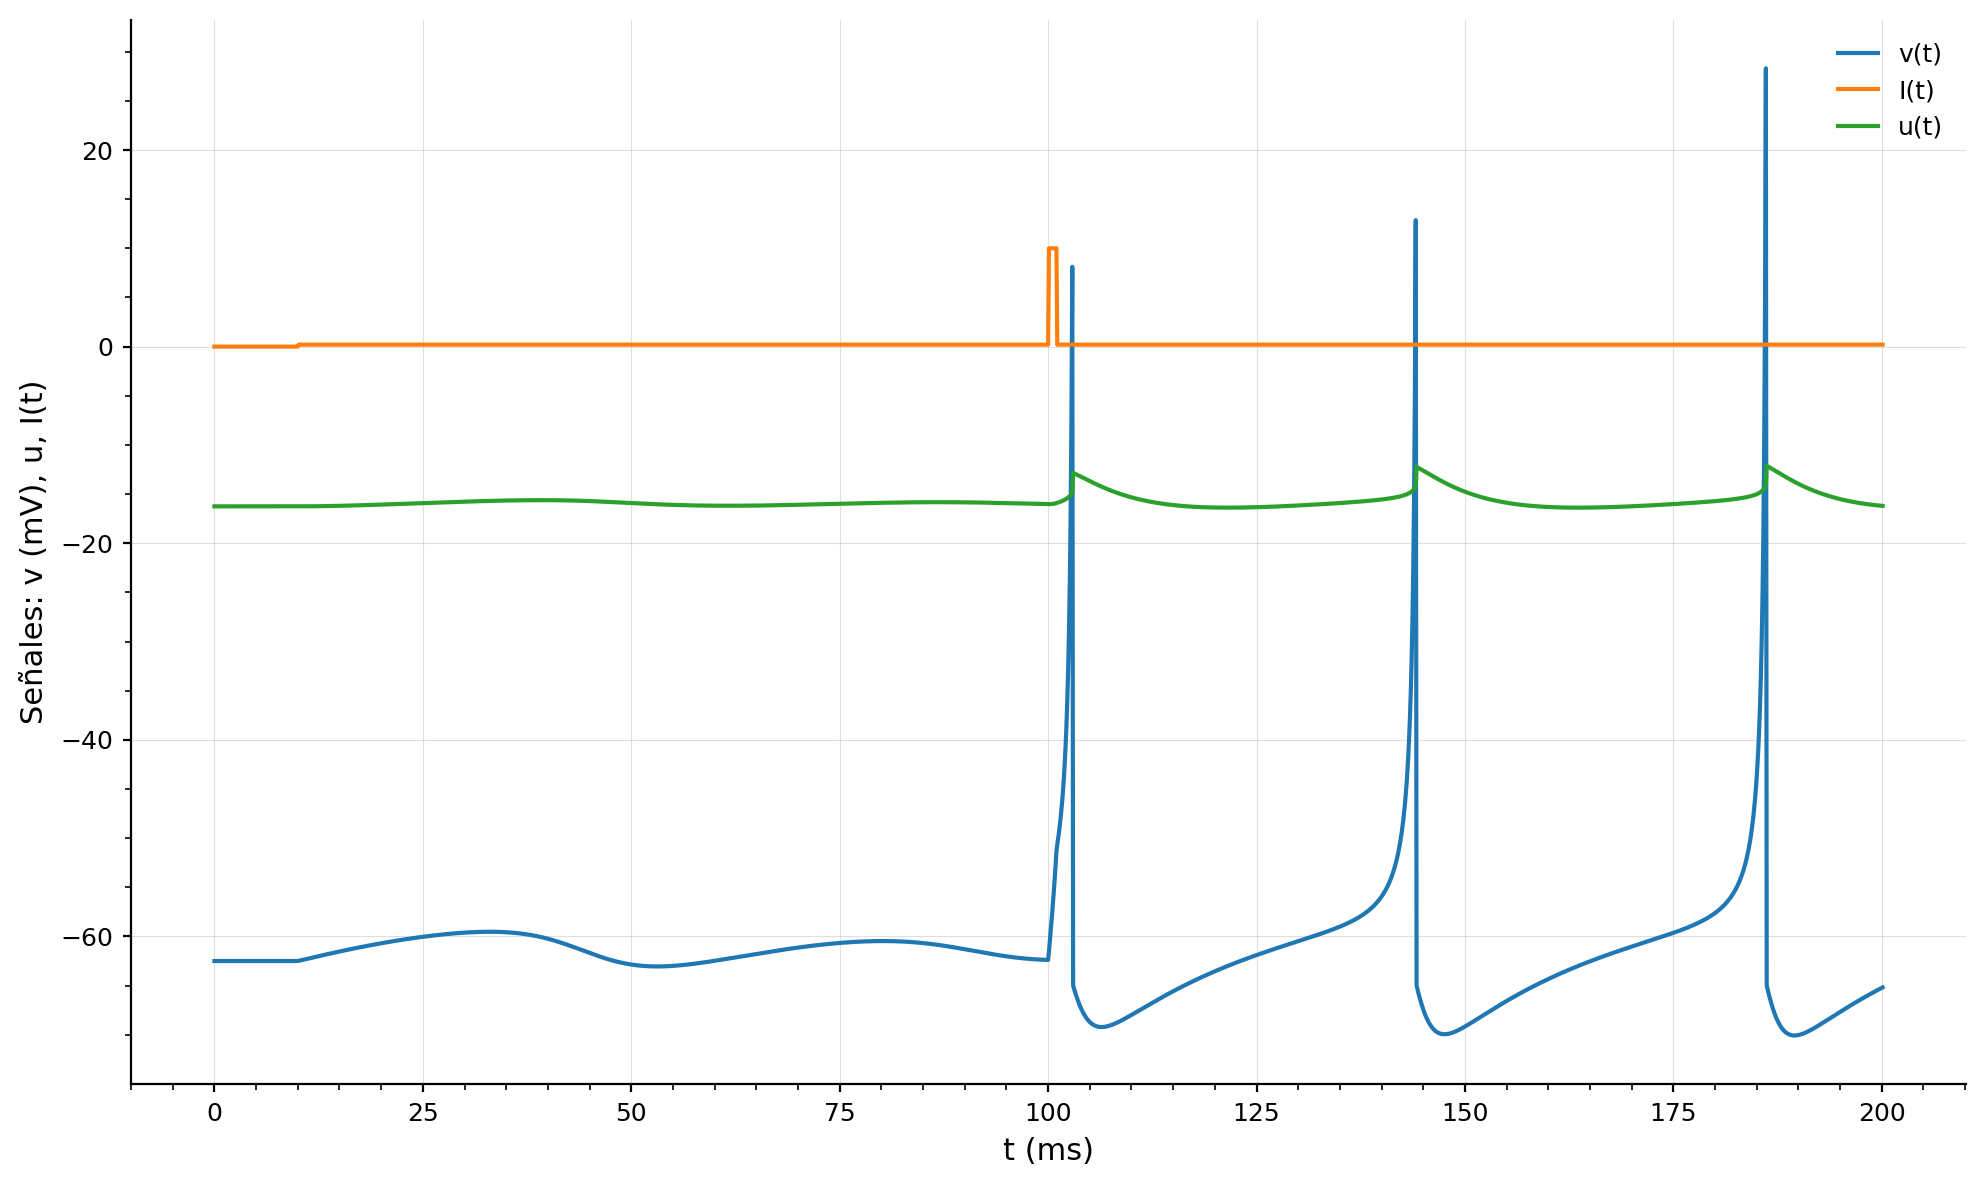

7
Integrando neurona 7: LTS
  Spikes: 16


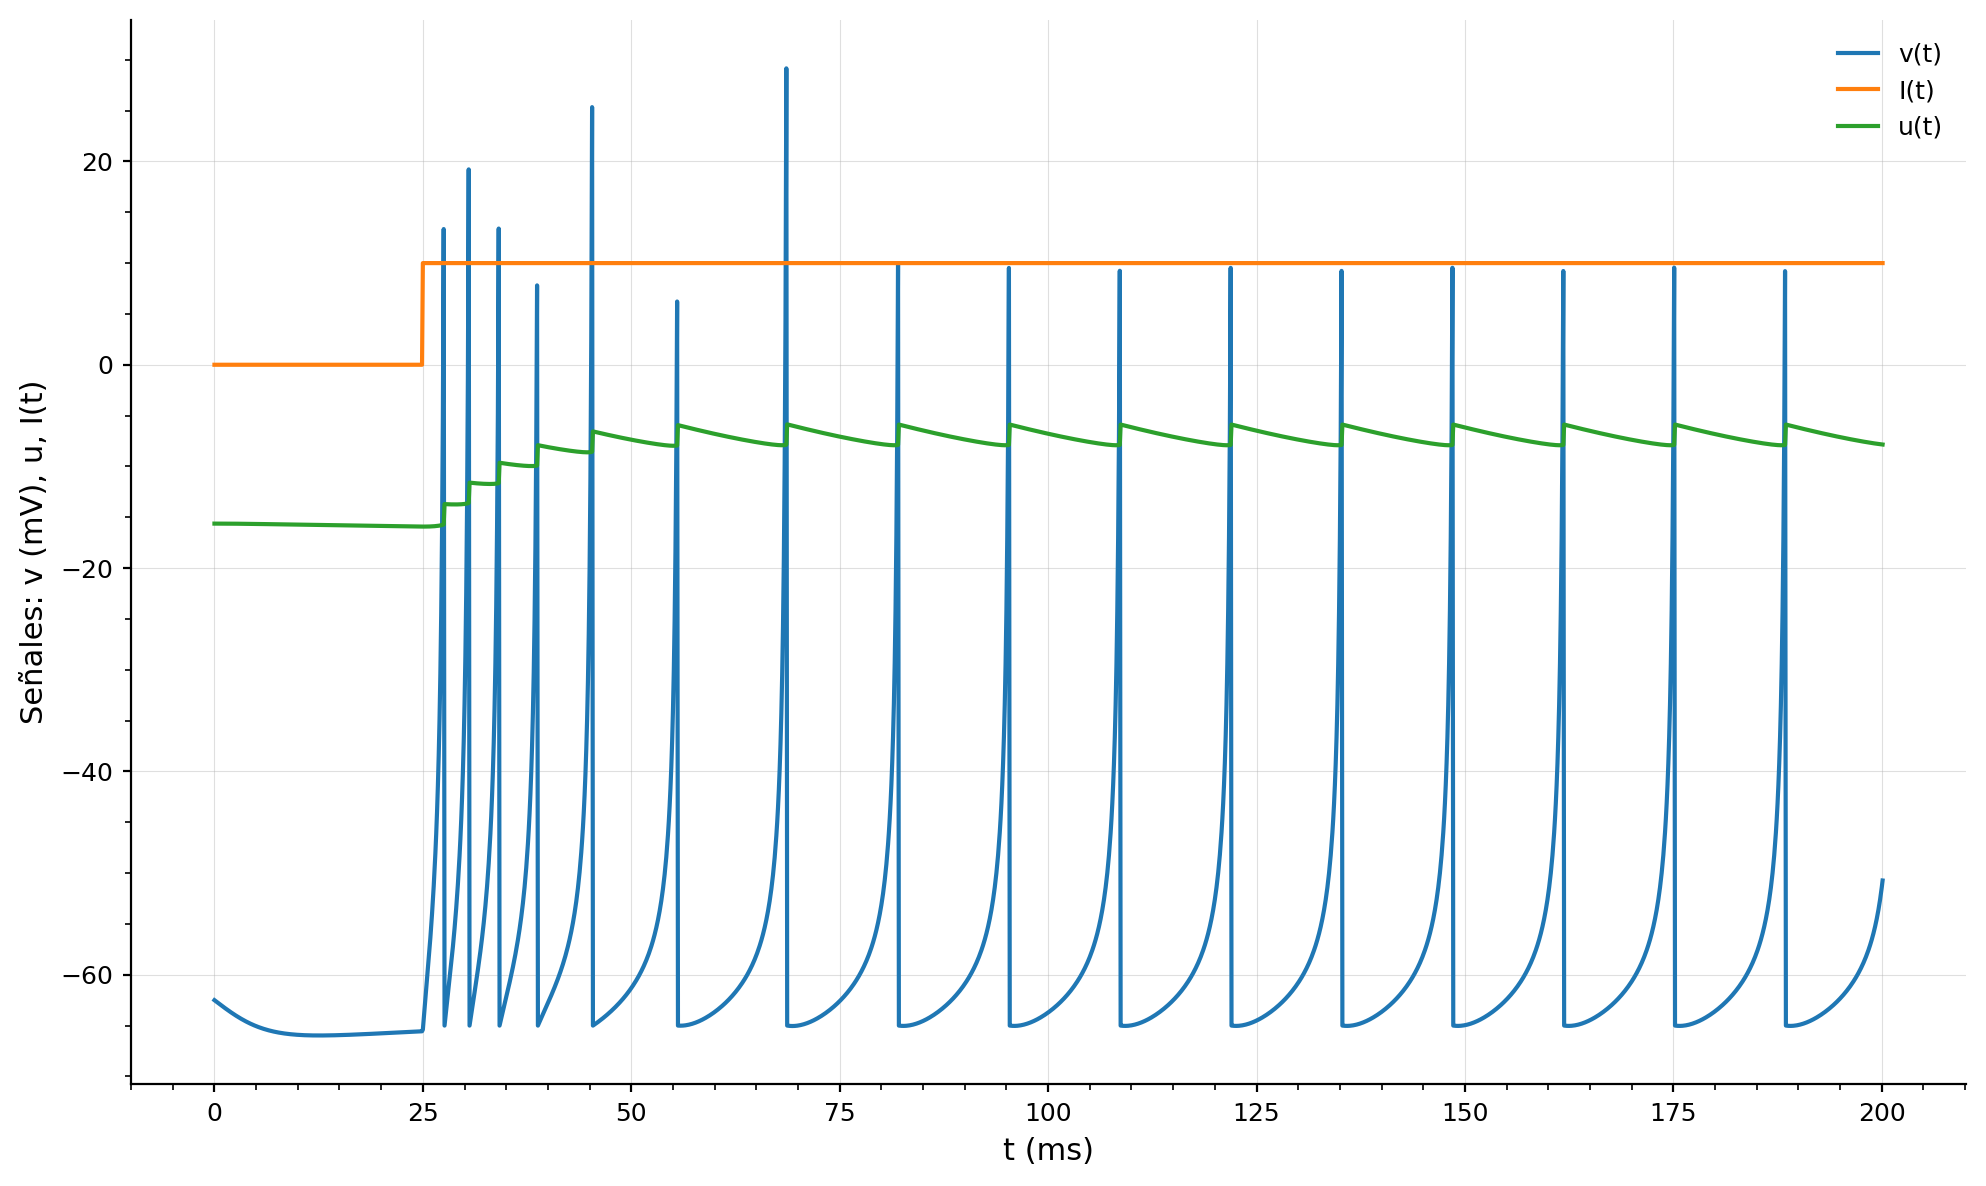

In [6]:
# Parameter für 8 Neuronentypen
c = np.array([0.2, 0.2, 0.2, 0.2, 0.25, 0.25, 0.26, 0.25])
b = np.array([0.02, 0.02, 0.02, 0.1, 0.02, 0.02, 0.1, 0.02])
vmenos = np.array([-65, -55, -50, -65, -65, -65, -65, -65])
du = np.array([8, 4, 2, 2, 0.05, 0.05, 2, 2])
string = "RS IB CH FS TC1 TC2 RZ LTS"
elemen = len(b)

def I_func(t,i):
    if i <= 3 or i == 7:
        return 0 if t < 25 else 10
    elif i == 4:
        return 0 if t < 150 else 2.5
    elif i == 5:
        return -15 if t < 100 else 0
    elif i == 6:
        if t < 10: return 0
        elif 10 <= t < 100: return 0.2
        elif 100 <= t < 101: return 10
        else: return 0.2

# Integrator (gleich wie oben, nur Startwerte etwas anders)
def Integraconrk4Izikevich(f, t_int, h, i):
    c_i = c[i]; b_i = b[i]; vmenos_i = vmenos[i]; du_i = du[i]
    v0 = -62.5; u0 = c_i * v0
    t0, tf = t_int
    t_values, u_values, v_values = [t0], [u0], [v0]
    t, u, v = t0, u0, v0
    spike_times = []
    while t < tf:
        un, vn = rk4_sistema(f, u, v, t, h, i, b_i, c_i)
        if (v < vmas) and (vn >= vmas):
            un = u + du_i; vn = vmenos_i; spike_times.append(t)
        u, v, t = un, vn, t+h
        t_values.append(t); u_values.append(u); v_values.append(v)
    return t_values, u_values, v_values, spike_times

# Plot
for i in range(elemen):
    print(i)
    print(f"Integrando neurona {i}: {string.split()[i]}")
    t_values, u_values, v_values, spike_times = Integraconrk4Izikevich(f_ode, t_rango, h, i)

    print(f"  Spikes: {len(spike_times)}")
    fig, ax = plt.subplots(figsize=_figsize())
    ax.plot(t_values, v_values, label="v(t)")
    I_values = [I_func(t, i) for t in t_values]
    ax.plot(t_values, I_values, label="I(t)")
    ax.plot(t_values, u_values, label="u(t)")

    if i == 4: ax.set_xlim(125, 200)
    elif i == 5: ax.set_xlim(75, 200)

    ax.set_xlabel("t (ms)")
    ax.set_ylabel("Señales: v (mV), u, I(t)")
    ax.grid(True, linewidth=0.4, alpha=0.4)
    ax.legend(frameon=False, handlelength=1.6)
    style_axes(ax)

    save_fig(f"parte3_{string.split()[i]}")
    plt.show()


0
Integrando neurona 0: RS
  Spikes: 5


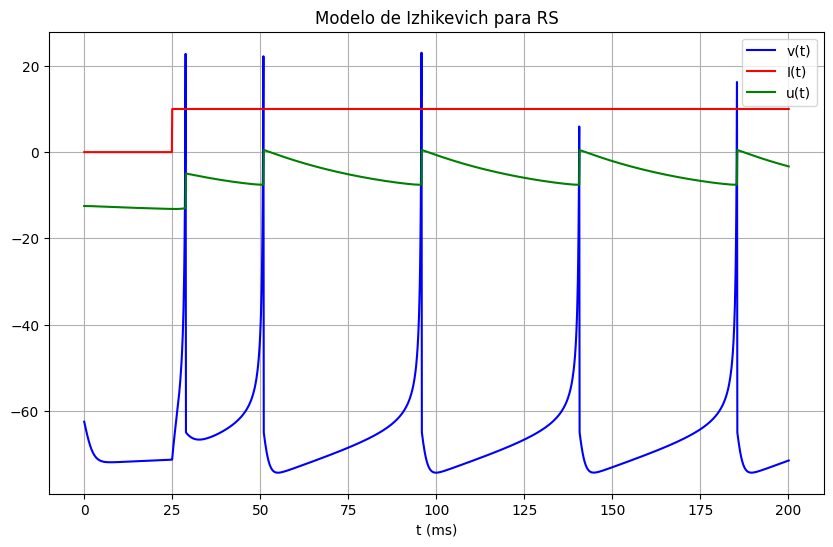

1
Integrando neurona 1: IB
  Spikes: 8


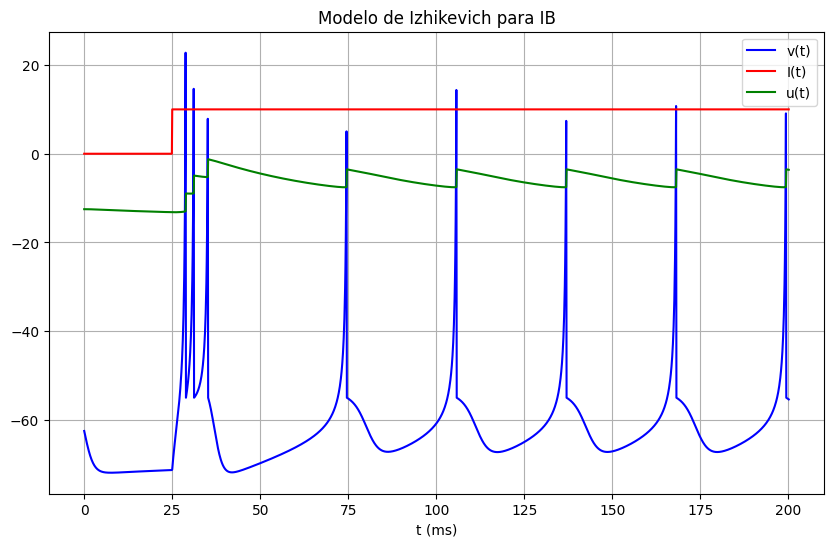

2
Integrando neurona 2: CH
  Spikes: 17


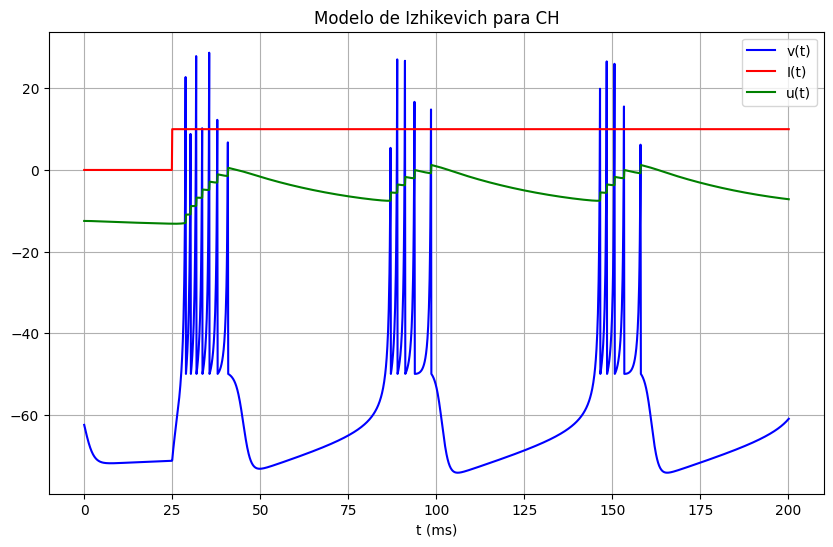

3
Integrando neurona 3: FS
  Spikes: 25


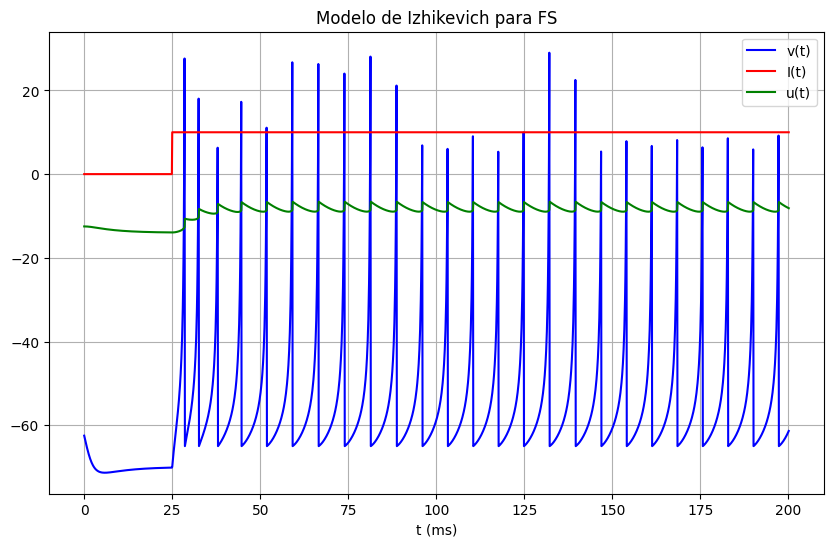

4
Integrando neurona 4: TC1
  Spikes: 6


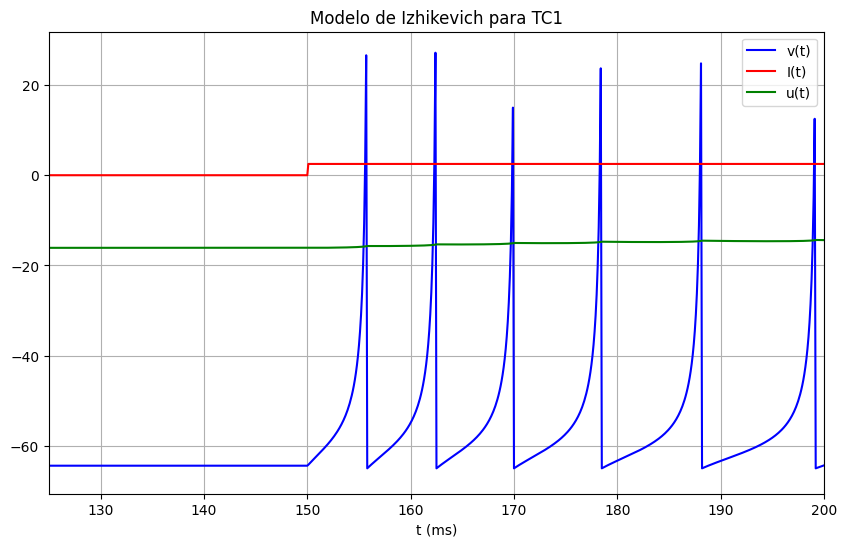

5
Integrando neurona 5: TC2
  Spikes: 5


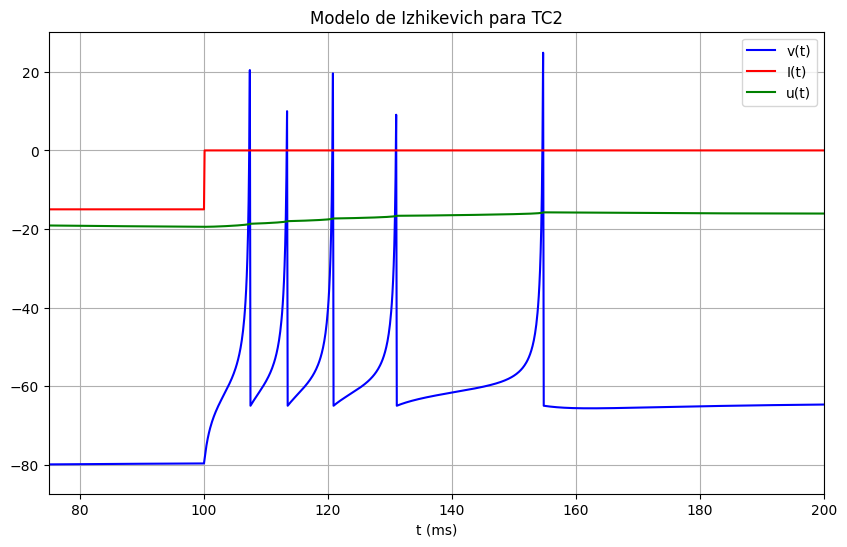

6
Integrando neurona 6: RZ
  Spikes: 3


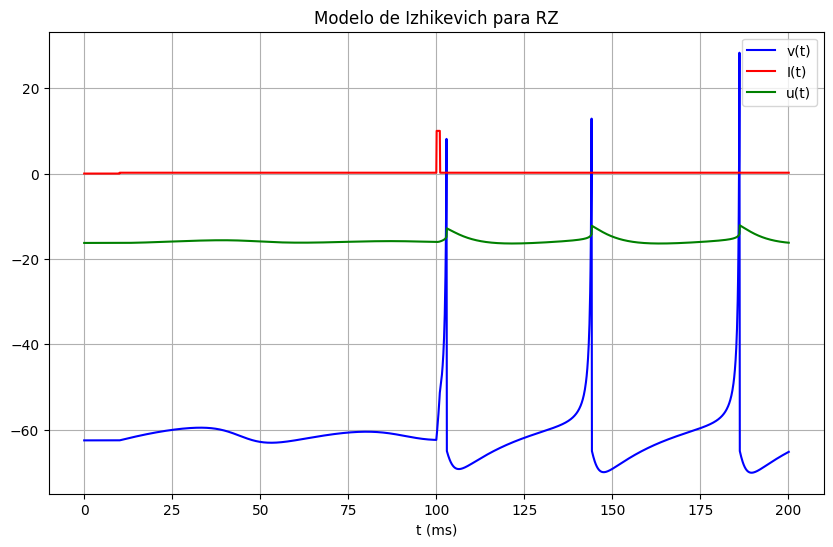

7
Integrando neurona 7: LTS
  Spikes: 16


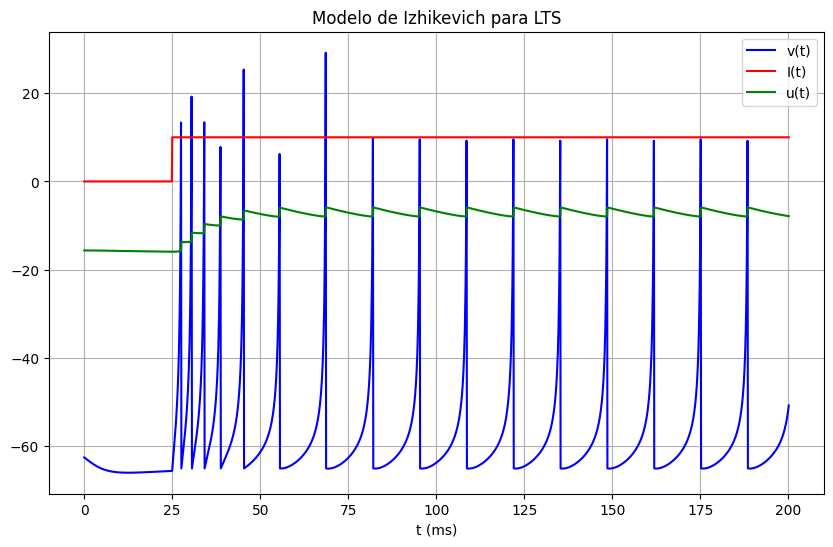

## **Ejercicio 3)** Red de neuronas de Izhikevich

### El método de Euler-Maruyama

Nos interesa resolver una Ecuación Diferencial Estocástica (SDE) de la forma

$$dX_t = f(X_t,t)dt + g(X_t,t)dW_t\;\;\;\; (1)$$

donde, para cada $t\in \mathbb{R}$, las variables $X_t,W_t$ son estocásticas con soporte en $\mathbb{R}$, y $f,g \in (\mathbb{R}^2\to \mathbb{R})$ son funciones relativamente arbitrarias.
Como función de $t$, asuminos que $W_t$ describe un proceso de Wiener. Es decir, asumimos que

1. $W_t$ es una variable estocástica normalmente distribuida de valor esperado $\langle W_t \rangle = 0$ y varianza $\langle (W_t-\langle W_t\rangle)^2 \rangle = \langle W_t^2 \rangle = wt$ para algún $w\geq 0$, y

2. las variables estocásticas $W_{t+s}-W_s$ (caminatas futuras) y $W_s$ (caminatas pasadas) son estadísticamente independientes para todo $t\geq 0$ y $s\leq t$.

Nos interesa resolver la Ec. (1) en un intervalo $t\in [0,T]$ para una condición inicial $X_0=x_0$.

El método de Euler-Maruyama provee una aproximación $Y_t \approx X_t$ para $t\in \{0,\tau,2\tau,...,T\}$ donde $\tau=T/N$ para algún $N\gg 1$ fijo, y viene dado por la cadena de Markov

$$Y_{t+\tau} = Y_t + f(Y_t,t)\tau + g(Y_t,t)w\sqrt{\tau}\mathcal{N}\;\;\;\; (2)$$

donde $Y_0=x_0$ y $\mathcal{N}$ es una variable aleatoria normalmente distribuida de valor esperado $0$ y varianza $1$.

#### Caso multidimensional

El caso multidimensional es de la forma

$$dX_t = f(X_t,t)dt + g(X_t,t)dW_t\;\;\;\; (4)$$

donde $X_t,f(X_t,t) \in \mathbb{R}^d$, $g(X_t,t)\in \mathbb{R}^{d\times m}$ y $W_t\in \mathbb{R}^m$ para $d,m \in \mathbb{N}$.

En componentes

$$dX_{it} = f_i(X_t,t)dt + \sum_{j=1}^m g_{ij}(X_t,t)dW_{jt}\;\;\;\; (5)$$

Luego, la aproximación de Euler Maruyama toma la forma

$$Y_{i,t+\tau} = Y_{it} + f_i(Y_t,t)\tau + \sum_{j=1}^m g_{ij}(Y_t,t)w_j\sqrt{\tau}\mathcal{N}_j\;\;\;\; (6)$$

donde $\mathcal{N}_1,...,\mathcal{N}_m$ son variables aleatorias independientes, normalmente distribuidas, de valor esperado 0 y varianza 1.

### Red neuronal de Izhikevich

El modelo de neurona de Izhikevich es una Ecuación Diferencial Ordinaria (ODE), por lo que no hay estocasticidad.

Para simular una red, Izhikevich propone acoplar un sistema de neuronas con señales de ruido, tornando la ODE en una SDE.
Concretamente, propone acoplar $n_e$ neuronas exitatorias y $n_i$ neuronas inhibitorias mediante una matriz de interacciones $a_{ij}$ con $i,j\in \{1,2,...,n\}$ para $n:=n_e+n_i$ utilizando la ODE

\begin{eqnarray}
\dot{v}_i(t) & = &  g_2v_i^2(t) + g_1v_i(t) + g_0 - u_i(t) + \sum_{j=1}^n a_{ij} \Theta(v_j(t)) \;\;\;\; (7) \\
\dot{u}_i(t) & = &  b_i(c_iv_i(t)-u_i(t))
\end{eqnarray}

donde $I_i(t) = \sum_{j=1}^n a_{ij} \Theta(v_j(t))$ representa el input externo afectando a la neurona $i$.
Considerando valores $r_{ij}$ tomados aleatoria e independientemente de la distribución uniforme en $[0,1]$, se utiliza $a_{ij}=\frac{1}{2}r_{ij}$ para todo $i$ y $j=1,...,n_e$ (i.e. señales provenientes de neuronas exitatorias) y $a_{ij}=-r_{ij}$ para todo $i$ y $j=n_e+1,...,n$ (i.e. señales provenientes de neuronas inhibitorias).
Aquí, la función escalón de Heaviside, la cual satisface $\Theta(x)=1$ si $x>0$ y $\Theta(x)=0$ en caso contrario, es utilizada para normalizar la señal de disparo de las neuronas de entrada.
El disparo de la $i$-ésima neurona se implementa aplicando la condición de reseteo

\begin{eqnarray}
v_i(t) &\leftarrow& v_{i-} \;\;\;\; (8) \\
u_i(t) &\leftarrow& u_i(t) + \Delta u_i \\
\end{eqnarray}

cuando $v_i(t) \geq v_{i+}$.
Los valores de los parámetros para las variables exitatorias son son $b_i=0.02$, $c_i=0.2$, $v_{i-} = -64+15r_i^2$ y $\Delta u_i = 8-6r_i^2$, donde $R_i$ es la realización de una variable aleatoria definida uniformemente en el intervalo $[0,1]$.
Mientras que para las variables inhibitorias son $b_i=0.02+0.08r_i$, $c_i=0.25-0.05r_i$, $v_{i-} = -65$ y $\Delta u_i = 2$.
Esto introduce heterogeneida en el sistema, y la idea es que los límites $r_i=0$ corresponde neuronas que disparan regularmente, mientras que $r_i=1$ a neuronas *parloteantes*.

Luego, Izhikevich incorpora un ruido estocástico $dW_i(t)$ a la señal de entrada $I_i(t)$, de modo que el sistema de ODEs se transforma en un sistema de SDEs en donde las variables $v_i(t)$ y $u_i(t)$ se convierten en variables estocásticas $V_{i}(t)$ y $U_{i}(t)$, respectivamente.
De esta manera, en la aproximación de Euler-Maruyama, la Ec. (7) adopta la forma

\begin{eqnarray}
dV_{it} & = &  \bigg(g_2V_{it}^2 + g_1V_{it} + g_0 - U_{it} + \sum_{j=1}^n a_{ij} \Theta(V_{it})\bigg)dt + dK_{it} \;\;\;\; (9) \\
dU_{it} & = &  b_i(c_iV_{it}-U_{it})dt
\end{eqnarray}

donde $dK_{it}$ representa el ruido estocástico Gaussiano $dW_i(t)$ anteriormente mencionado.
Los valores $dK_{it}$ se obtienen de la distribución Gaussiana de media 0 y desviación estandard igual a $5$ para $i=1,...,n_e$ e igual a $2$ para $i=n_e+1,...,n$.
Obviando el reseteo de la Ec. (8), el sistema de SDEs de la Ec. (9) corresponde al sistema de la Ec. (5) cuando:

1. $X_{it} = V_{it}$,

2. $X_{i+n,t} = U_{it}$,

3. $f_i(X_t,t) = g_2X_{it}^2 + g_1X_{it} + g_0 - X_{i+n,t} + \sum_{j=1}^n a_{ij} \Theta(X_{it})$,

4. $f_{i+n}(X_t,t) = b_i(c_iX_{it}-X_{i+n,t})$,

para todo $i=1,...,n$,

5. y que

    \begin{eqnarray}
    g_{ij}(X_t,t)
    &=&
    \left\{
    \begin{array}{ll}
    5 & i=j\leq n_e, \\
    2 & n_e \leq i=j\leq n, \\
    0 & c.c.
    \end{array}
    \right.
    \end{eqnarray}

    de manera que

    $$
    dK_{it} = \sum_{j=1}^n g_{ij}(X_t,t) dW_{jt}
    $$

    donde $dW_{jt}$ es una variable aleatoria tomada de la distribución Gaussiana de media 0 y varianza 1 para todo tiempo $t$ y neurona $j=1,...,n$.

### Refs.

* https://en.wikipedia.org/wiki/Euler%E2%80%93Maruyama_method
* https://ipython-books.github.io/134-simulating-a-stochastic-differential-equation/

* https://github.com/mattja/sdeint/blob/master/sdeint/integrate.py

* https://diffeq.sciml.ai/stable/tutorials/sde_example/

**1)** Adapte el código en Matlab del paper de Izhikevich a código en Python.

**2)** Acomode el código anterior a la teoría mencionada remplazando la función escalón $\Theta$ de Heavised por la función

$$
z(v)=\frac{87+v}{450}-0.0193
$$

**3)** Reproduzca la figura 3 del paper. Sugerencia, compartimentabilice el código en funciones, identificando las distintas componentes mencionadas en la teoría.

In [ ]:
# 3.1)